# Growth Rates

In [22]:
from patsy import dmatrices
import pandas as pd
import seaborn as sns
import statsmodels.api as sma
import statsmodels as sm
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale = 2.5)
plt.rcParams['figure.figsize'] = (12, 9)

In [24]:
# Data Import
A = pd.read_excel("Data/Lockdown Relaxations/A.xlsx")
B = pd.read_excel("Data/Lockdown Relaxations/B.xlsx")
C = pd.read_excel("Data/Lockdown Relaxations/C.xlsx")
D = pd.read_excel("Data/Lockdown Relaxations/D.xlsx")
E = pd.read_excel("Data/Lockdown Relaxations/E.xlsx")

In [ ]:
# The infection count columnss
infection_counts = [str(i) for i in range(25)]

## Model fitting to the data
Uses our standard approach to estimate the growth rate.

In [20]:
def estimate_growth_rates(data_in, days_to_use = 20):
    """
    Input the infection counts of the data
    
    Returns the dataframe with the estimated growth rates attached
    """
    
    infection_counts = [str(i) for i in range(days_to_use)]
    
    data_subset = data_in[infection_counts]
    
    growth_rates = []
    
    for _ in range(data_in.shape[0]):
        
        # Print the current progress
        print(f"current fit; {_}", end = "\r")

        # Difference the data and log it
        log_diff = data_subset.iloc[_].diff(1).apply(lambda x: np.log(x))

        # Set up a dictionary to create the dataframe
        data_set_up = {
            "log_case_incidence": log_diff[10:days_to_use],
            "time": list(range(10, days_to_use))
        }
        dataframe = pd.DataFrame(data_set_up)

        # Linear model fitting
        y, X = dmatrices('log_case_incidence ~ time', 
                         data = dataframe)
        model = sma.RLM(y, X)
        res = model.fit()
        growth_rates.append(res.params[1])

        #fig = sm.graphics.regressionplots.plot_fit(res, 1)

        if res.params[1] == -float("inf"):
            print(f"missing data in line {_}")

    growth_rate_series = pd.Series(growth_rates)
    data_in["growth_rate"] = growth_rate_series
    
    return data_in

In [29]:
A = estimate_growth_rates(A)
B = estimate_growth_rates(B)
C = estimate_growth_rates(C)
D = estimate_growth_rates(D)
E = estimate_growth_rates(E)

Text(0, 0.5, 'Density')

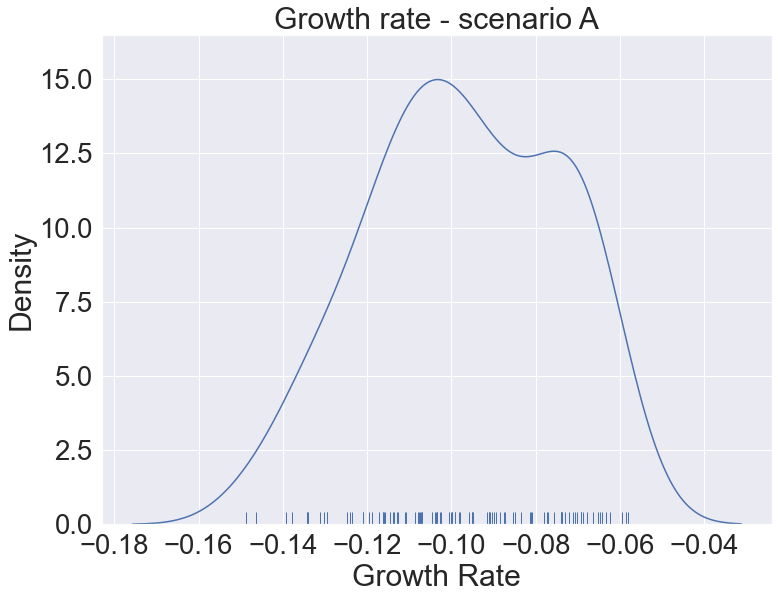

In [30]:
sns.distplot(A["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario A")
plt.xlabel("Growth Rate")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

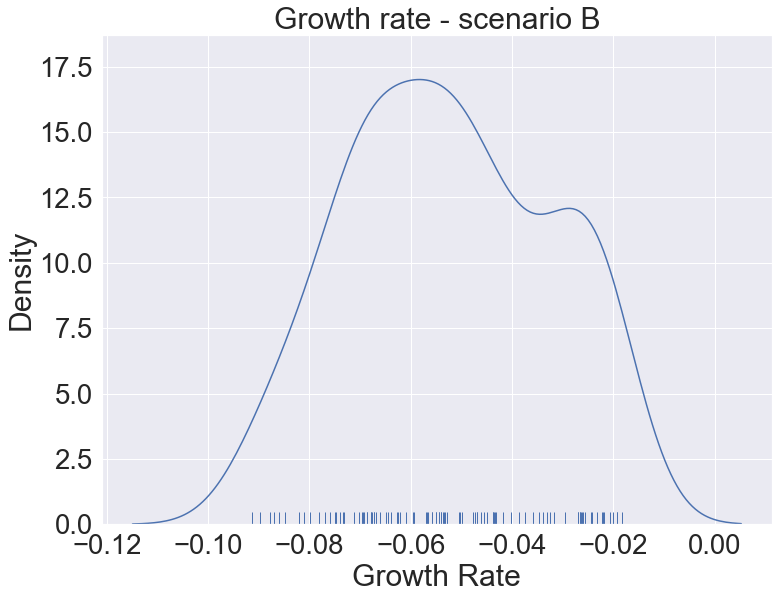

In [31]:
sns.distplot(B["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario B")
plt.xlabel("Growth Rate")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

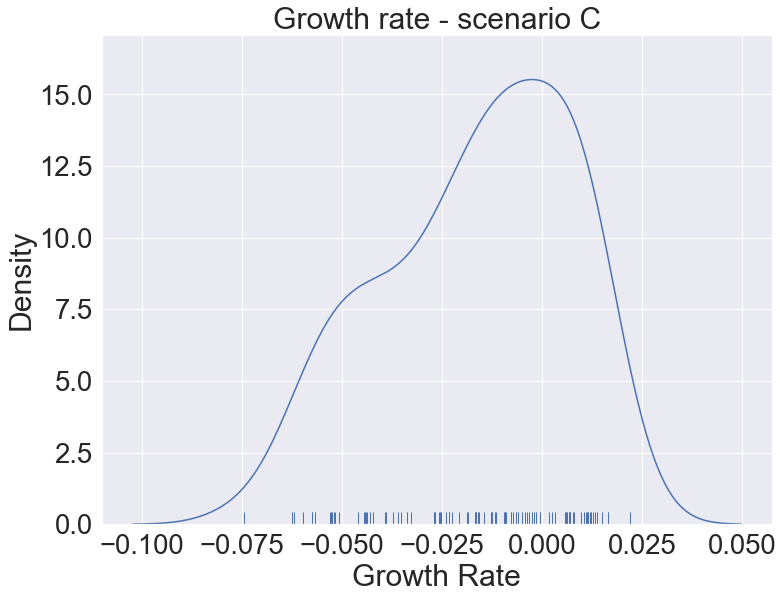

In [32]:
sns.distplot(C["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario C")
plt.xlabel("Growth Rate")
plt.ylabel("Density")

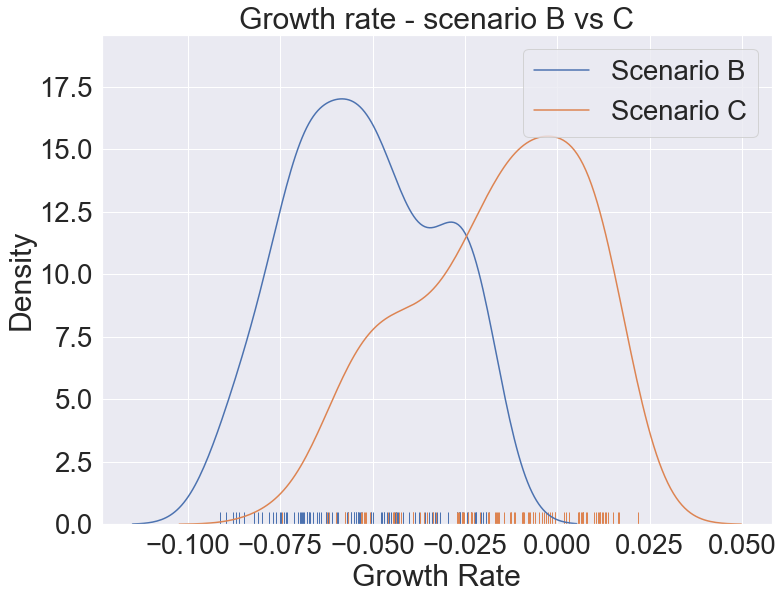

In [33]:
sns.distplot(B["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario B vs C")
sns.distplot(C["growth_rate"], hist = False, rug = True)
plt.xlabel("Growth Rate")
plt.ylabel("Density")
plt.legend(("Scenario B", "Scenario C"))

Text(0, 0.5, 'Density')

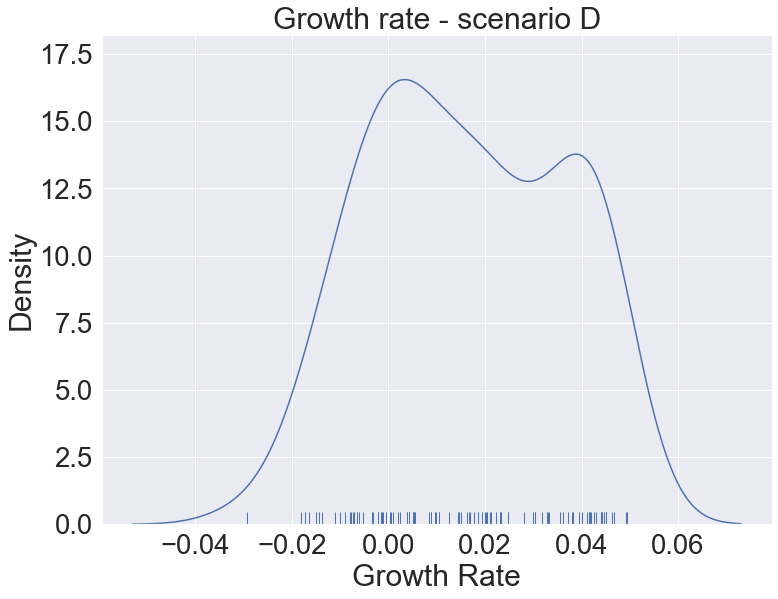

In [34]:
sns.distplot(D["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario D")
plt.xlabel("Growth Rate")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

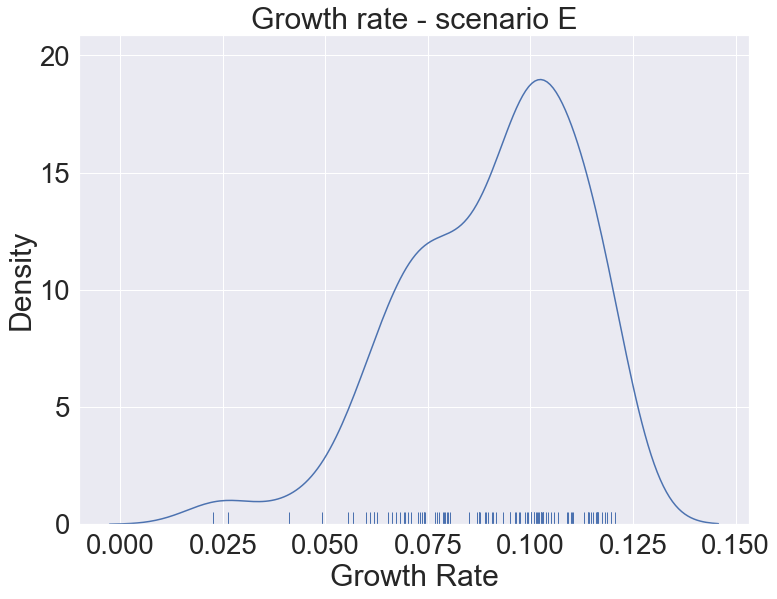

In [35]:
sns.distplot(E["growth_rate"], hist = False, rug = True)
plt.title("Growth rate - scenario E")
plt.xlabel("Growth Rate")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

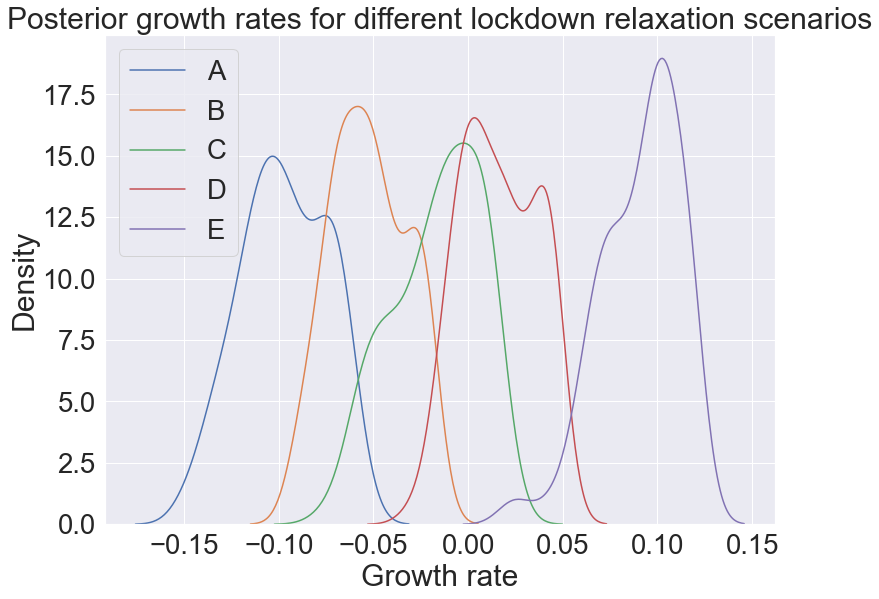

In [36]:
sns.distplot(A["growth_rate"], hist = False)
sns.distplot(B["growth_rate"], hist = False)
sns.distplot(C["growth_rate"], hist = False)
sns.distplot(D["growth_rate"], hist = False)
sns.distplot(E["growth_rate"], hist = False)
plt.legend(["A", "B", "C", "D", "E"])
plt.title("Posterior growth rates for different lockdown relaxation scenarios")
plt.xlabel("Growth rate")
plt.ylabel("Density")

In [37]:
def growth_rate_to_doubling_time(growth_rates):
    return np.sign(growth_rates) * (np.log(2) / (np.sign(growth_rates) * growth_rates))

def doubling_time_to_growth_rate(doubling_times):
    return np.sign(doubling_times) * ( np.log(2) / (np.sign(doubling_times) * doubling_times))

In [56]:
# x_vals = np.linspace(-0.15, 0.15, 7)
# tick_to_omit = 3
# x_vals = np.concatenate((x_vals[:(tick_to_omit)], x_vals[(tick_to_omit + 1):]))


x_vals = [doubling_time_to_growth_rate(x) for x in [-28,-12,-7,-5, -4, -3, 3, 4, 5,7,12,28]]

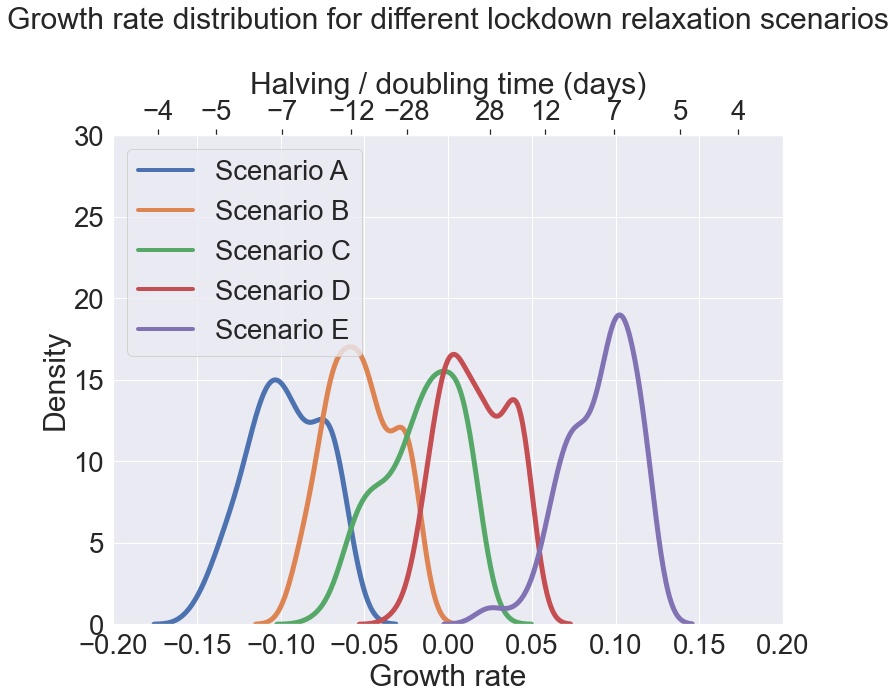

In [57]:
fig, ax = plt.subplots()

sns.distplot(A["growth_rate"], hist = False, kde_kws=dict(linewidth=5))
sns.distplot(B["growth_rate"], hist = False, kde_kws=dict(linewidth=5))
sns.distplot(C["growth_rate"], hist = False, kde_kws=dict(linewidth=5))
sns.distplot(D["growth_rate"], hist = False, kde_kws=dict(linewidth=5))
sns.distplot(E["growth_rate"], hist = False, kde_kws=dict(linewidth=5))

# Creating the lines to be used in the plot legend
lines_legend = [
    plt.Line2D([0, 1], [0, 1], color=sns.color_palette()[0], linewidth = 4),
    plt.Line2D([0, 1], [0, 1], color=sns.color_palette()[1], linewidth = 4),
    plt.Line2D([0, 1], [0, 1], color=sns.color_palette()[2], linewidth = 4),
    plt.Line2D([0, 1], [0, 1], color=sns.color_palette()[3], linewidth = 4),
    plt.Line2D([0, 1], [0, 1], color=sns.color_palette()[4], linewidth = 4)
]

plt.legend(lines_legend, ["Scenario A", "Scenario B", "Scenario C", "Scenario D", "Scenario E"])
plt.title("Growth rate distribution for different lockdown relaxation scenarios\n\nHalving / doubling time (days)")
plt.xlabel("Growth rate")
plt.ylabel("Density")

plt.xlim(-0.2, 0.2)
plt.ylim(0, 30)

ax2 = ax.secondary_xaxis("top", functions=(growth_rate_to_doubling_time, doubling_time_to_growth_rate))
ax2.set_ticks(growth_rate_to_doubling_time(x_vals), minor = False)
plt.savefig("Figures/Lockdown Relaxations/comparison.svg", bbox_inches = 'tight')
plt.savefig("Figures/Lockdown Relaxations/comparison.png", bbox_inches = 'tight')